<!--NAVIGATION-->
< [高级索引](02.07-Fancy-Indexing.ipynb) | [目录](Index.ipynb) | [格式化数据：NumPy里的结构化数组](02.09-Structured-Data-NumPy.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.08-Sorting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Sorting Arrays

# 数组排序

> Up to this point we have been concerned mainly with tools to access and operate on array data with NumPy.
This section covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had dreams (or, depending on your temperament, nightmares) about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more.
All are means of accomplishing a similar task: sorting the values in a list or array.

本节之前，我们主要关注NumPy中那些获取和操作数组数据的工具。本小节我们会介绍对NumPy数组进行排序的算法。这些算法在基础计算机科学领域是很热门的课题：如果你学习过相关的课程的话，你可能梦（或者根据你的经历，可能是噩梦）到过有关*插入排序*、*选择排序*、*归并排序*、*快速排序*、*冒泡排序*和其他很多很多名词。这些都是为了完成一件工作的：对数组进行排序。

> For example, a simple *selection sort* repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

例如，一个简单的*选择排序*会重复寻找列表中最小的值，然后和当前值进行交换，直到列表排序完成。我们可以在Python中用简单的几行代码完成这个算法：

In [1]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:]) # 寻找子数组中的最小值的索引序号
        (x[i], x[swap]) = (x[swap], x[i]) # 交换当前值和最小值
    return x

In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

> As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays.
For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value.
In terms of the "big-O" notation often used to characterize these algorithms (see [Big-O Notation](#Aside:-Big-O-Notation)), selection sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time will go up by about a factor of four.

任何一个5年的计算机科学专业都会教你，选择排序很简单，但是对于大的数组来说运行效率就不够了。对于数组具有$N$个值，它需要$N$次循环，每次循环中需要$\sim N$次比较和寻找来交换元素。*大O*表示法经常用来对算法性能进行定量分析（参见[大O复杂度](#Aside:-Big-O-Notation)），选择排序平均需要$\mathcal{O}[N^2]$：如果列表中的元素个数加倍，执行时间增长大约是原来的4倍。

> Even selection sort, though, is much better than my all-time favorite sorting algorithms, the *bogosort*:

甚至选择排序也远比下面这个*bogo排序*算法有效地多，这是作者最喜爱的排序算法：

In [3]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [4]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

> This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted.
With an average scaling of $\mathcal{O}[N \times N!]$, (that's *N* times *N* factorial) this should–quite obviously–never be used for any real computation.

这个有趣而粗苯的算法完全依赖于概率：它重复的对数组进行随机的乱序直到结果刚好是正确排序为止。这个算法平均需要$\mathcal{O}[N \times N!]$，即*N*乘以*N*的阶乘，明显的，在真实情况下，它不应该被用于排序计算。

> Fortunately, Python contains built-in sorting algorithms that are *much* more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

幸运的是，Python內建有了排序算法，比我们刚才提到那些简单的算法都要高效。我们从Python內建的排序开始介绍，然后再去讨论NumPy中为了数组优化的排序函数。

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

## NumPy中快速排序：`np.sort` 和 `np.argsort`

> Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

虽然Python有內建的`sort`和`sorted`函数可以用来对列表进行排序，我们在这里不讨论它们。因为NumPy的`np.sort`函数有着更加优秀的性能，而且也更满足我们要求。默认情况下`np.sort`使用的是$\mathcal{O}[N\log N]$*快速排序*排序算法，*归并排序*和*堆排序*也是可选的。对于大多数的应用场景来说，默认的快速排序都能满足要求。

> To return a sorted version of the array without modifying the input, you can use ``np.sort``:

对数组进行排序，返回排序后的结果，不改变原始数组的数据，你应该使用`np.sort`：

In [5]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

> If you prefer to sort the array in-place, you can instead use the ``sort`` method of arrays:

如果你期望直接改变数组的数据进行排序，你可以对数组对象使用它的`sort`方法：

In [6]:
x.sort()
print(x)

[1 2 3 4 5]


> A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

相关的函数是`argsort`，它将返回排好序后元素原始的序号序列：

In [7]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


> The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

结果的第一个元素是数组中最小元素的序号，第二个元素是数组中第二小元素的序号，以此类推。这些序号可以通过高级索引的方式使用，从而获得一个排好序的数组：

译者注：更好的问题应该是，假如我们希望获得数组中第二、三小的元素，我们可以这样做：

```python
x[i[1:3]]
```

In [8]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

### 按照行或列进行排序

> A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

NumPy的排序算法可以沿着多维数组的某些轴`axis`进行，如行或者列。例如：

In [9]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [10]:
# 沿着每列对数据进行排序
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [11]:
# 沿着每行对数据进行排序
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

> Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

必须注意的是，这样的排序会独立的对每一行或者每一列进行排序。因此结果中原来行或列之间的联系都会丢失。

## Partial Sorts: Partitioning

## 部分排序：分区

> Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

有时候我们并不是需要对整个数组排序，而仅仅需要找到数组中的*K*个最小值。NumPy提供了`np.partition`函数来完成这个任务；结果会分为两部分，最小的*K*个值位于结果数组的左边，而其余的值位于数组的右边，顺序随机：

In [12]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

> Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

你可以看到结果中最小的三个值在左边，其余4个值位于数组的右边，每个分区内部，元素的顺序是任意的。

> Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

和排序一样，我们可以按照任意维度对一个多维数组进行分区：

In [13]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

> The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

结果中每行的前两个元素就是该行最小的两个值，该行其余的值会出现在后面。

> Finally, just as there is a ``np.argsort`` that computes indices of the sort, there is a ``np.argpartition`` that computes indices of the partition.
We'll see this in action in the following section.

最后，就像`np.argsort`函数可以返回排好序的元素序号一样，`np.argpartition`可以计算分区后元素的序号。后面的例子中我们会看到它的使用。

## Example: k-Nearest Neighbors

## 例子：k近邻

> Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.
We'll start by creating a random set of 10 points on a two-dimensional plane.
Using the standard convention, we'll arrange these in a $10\times 2$ array:

下面我们使用`argsort`沿着多个维度来寻找每个点的最近邻。首先在一个二维平面上创建10个随机点数据。按照惯例，这将是一个$10\times 2$的数组：

In [14]:
X = rand.rand(10, 2)

> To get an idea of how these points look, let's quickly scatter plot them:

我们先来观察一下这些点的分布情况，散点图很适合这种情形：

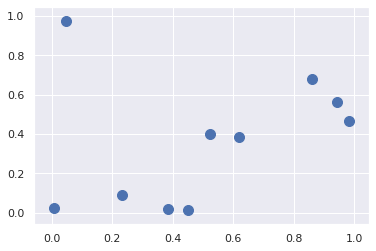

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 图表风格，seaborn
plt.scatter(X[:, 0], X[:, 1], s=100);

> Now we'll compute the distance between each pair of points.
Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting ([Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)) and aggregation ([Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb))  routines provided by NumPy we can compute the matrix of square distances in a single line of code:

现在让我们来计算每两个点之间的距离。距离平方的定义是两点坐标差的平方和。应用广播（[在数组上计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb)）和聚合([聚合：Min, Max, 以及其他](02.04-Computation-on-arrays-aggregates.ipynb))函数，我们可以使用一行代码就能计算出所有点之间的距离平方：

In [16]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

> This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

上面的这行代码包含很多的内容值得探讨，如果对于不是特别熟悉广播机制的读者来说，看起来可能会让人难以理解。当你读到这样的代码的时候，将它们打散成一步步的操作会有帮助：

In [17]:
# 计算每两个点之间的坐标距离
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [18]:
# 计算距离的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [19]:
# 按照最后一个维度求和
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

> Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

你可以检查这个矩阵的对角线元素，对角线元素的值是点与其自身的距离平方，应该全部为0：

In [20]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

> It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

确认正确。现在我们已经有了一个距离平方的矩阵，然后就可以使用`np.argsort`函数来按照每行来排序。最左边的列就会给出每个点的最近邻：

In [21]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


> Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

结果中的第一列是0到9的数字：这是因为距离每个点最近的是自己，正如我们预料的一样。

> By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

上面我们进行了完整的排序，事实上我们并不需要这么做。如果我们只是对最近的$K$个邻居感兴趣的话，我们可以使用分区来完成，只需要在距离平方矩阵中对每行进行$K+1$分区，只需要调用`np.argpartition`函数即可：

In [22]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

> In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

为了展示最近邻的网络结构，我们在图中为每个点和它最近的两个点之间连上线：

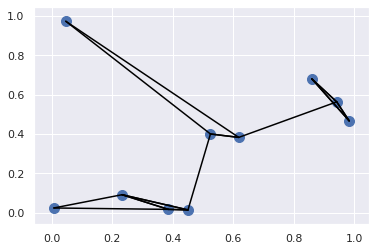

In [27]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 为每个点和它最近的两个点之间连上线
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 从X[i]连线到X[j]
        # 使用一些zip的魔术方法画线
        plt.plot(*zip(X[j], X[i]), color='black')

> Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

图上的每个点都和与它最近的两个点相连。初看起来，你可能注意到有些点的连线可能超过2条，这很奇怪：实际原因是如果A是B的最近两个近邻之一，并不代表着B也必须是A的最近两个近邻之一。

> Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

虽然使用广播和逐行排序的方式完成任务可能没有使用循环来的直观，但是在Python中这是一种非常有效的方式。你可能忍不住使用循环的方式对每个点去计算它相应的最近邻，但是这种方式几乎肯定会比我们前面使用的向量化方案要慢很多。向量化的解法还有一个优点，那就是它不关心数据的尺寸：我们可以使用同样的代码和方法计算100个点或1,000,000个点以及任意维度数的数据的最近邻。

> Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm. One example of this is the KD-Tree, [implemented in Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).

最后，需要说明的是，当对一个非常大的数据集进行最近邻搜索时，还有一种基于树或相似的算法能够将时间复杂度从$\mathcal{O}[N^2]$优化到$\mathcal{O}[N\log N]$或更好。其中一个例子是[KD-Tree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html)。

## Aside: Big-O Notation

## 额外内容：大 O 复杂度

> Big-O notation is a means of describing how the number of operations required for an algorithm scales as the input grows in size.
To use it correctly is to dive deeply into the realm of computer science theory, and to carefully distinguish it from the related small-o notation, big-$\theta$ notation, big-$\Omega$ notation, and probably many mutant thereof.
While these distinctions add precision to statements about algorithmic scaling, outside computer science theory exams and the remarks of pedantic blog commenters, you'll rarely see such distinctions made in practice.
Far more common in the data science world is a less rigid use of big-O notation: as a general (if imprecise) description of the scaling of an algorithm.
With apologies to theorists and pedants, this is the interpretation we'll use throughout this book.

大O复杂度是一种衡量随着输入数据的增加，需要执行的操作的数量的量级情况的指标。要正确使用它，需要深入了解计算机科学的理论知识，要和其他相关的概念如小O复杂度，大$\theta$复杂度，大$\Omega$复杂度区分开来，更加不容易。虽然精确地描述出这些复杂度是属于算法的范畴，除了学院派计算机科学理论的测验和评分以外，你在其他应用领域很难看到这些严格的定义和划分。在数据科学领域中，我们不会使用这样死板的大O复杂度概念，虽然这和算法领域的概念在精确程度上有一定差距。带着对理论学者和学院派的歉意，本书将一直使用对大O复杂度的这种非精确概念解释。

> Big-O notation, in this loose sense, tells you how much time your algorithm will take as you increase the amount of data.
If you have an $\mathcal{O}[N]$ (read "order $N$") algorithm that takes 1 second to operate on a list of length *N*=1,000, then you should expect it to take roughly 5 seconds for a list of length *N*=5,000.
If you have an $\mathcal{O}[N^2]$ (read "order *N* squared") algorithm that takes 1 second for *N*=1000, then you should expect it to take about 25 seconds for *N*=5000.

大O复杂度，简单来说，会告诉你当你的数据增大时，你的算法运行需要的时间。例如你有一个$\mathcal{O}[N]$（英文读作"Order $N$"）的算法，对于*N*=1000的数据量，它需要运行1秒，那么对于*N*=5000的数据量，算法需要执行的时间就为5秒。如果你的算法复杂度为$\mathcal{O}[N^2]$（英文读作"Order *N* squared"），对于*N*=1000的数据量需要运行1秒，那么你可以预期当数据量增长为*N*=5000时，运行时间为25秒。

> For our purposes, the *N* will usually indicate some aspect of the size of the dataset (the number of points, the number of dimensions, etc.). When trying to analyze billions or trillions of samples, the difference between $\mathcal{O}[N]$ and $\mathcal{O}[N^2]$ can be far from trivial!

对于我们的目标来说，*N*通常代表着数据集的大小（数据点的数量，维度数等）。当我们需要分析的数据样本量达到百万级或十亿级时，$\mathcal{O}[N]$和$\mathcal{O}[N^2]$之间的差距将会是巨大的。

> Notice that the big-O notation by itself tells you nothing about the actual wall-clock time of a computation, but only about its scaling as you change *N*.
Generally, for example, an $\mathcal{O}[N]$ algorithm is considered to have better scaling than an $\mathcal{O}[N^2]$ algorithm, and for good reason. But for small datasets in particular, the algorithm with better scaling might not be faster.
For example, in a given problem an $\mathcal{O}[N^2]$ algorithm might take 0.01 seconds, while a "better" $\mathcal{O}[N]$ algorithm might take 1 second.
Scale up *N* by a factor of 1,000, though, and the $\mathcal{O}[N]$ algorithm will win out.

请记住大O复杂度本身并不能告诉你实际上运算消耗的时间，它仅仅能够告诉你当*N*变化时，运行时间会怎样随之发生变化。通常来说，$\mathcal{O}[N]$复杂度的算法被认为肯定要比$\mathcal{O}[N^2]$复杂度的算法要好。但对于小的数据集来说，好的大O复杂度算法并不一定能带来更快的执行效率。例如，某个特定情况下，$\mathcal{O}[N^2]$复杂度的算法可能需要0.01秒的运行时间而$\mathcal{O}[N]$复杂度的算法可能需要1秒。但是如果将*N*增大1000倍，那么$\mathcal{O}[N]$复杂度的算法将会胜出。

> Even this loose version of Big-O notation can be very useful when comparing the performance of algorithms, and we'll use this notation throughout the book when talking about how algorithms scale.

我们这里使用的这种非严格定义的大O复杂度对于算法的性能也是有指示意义的，在本书的后续部分当我们讨论到算法范畴时都会应用到它。

<!--NAVIGATION-->
< [高级索引](02.07-Fancy-Indexing.ipynb) | [目录](Index.ipynb) | [格式化数据：NumPy里的结构化数组](02.09-Structured-Data-NumPy.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.08-Sorting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
